In [45]:
import cv2
import yaml
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

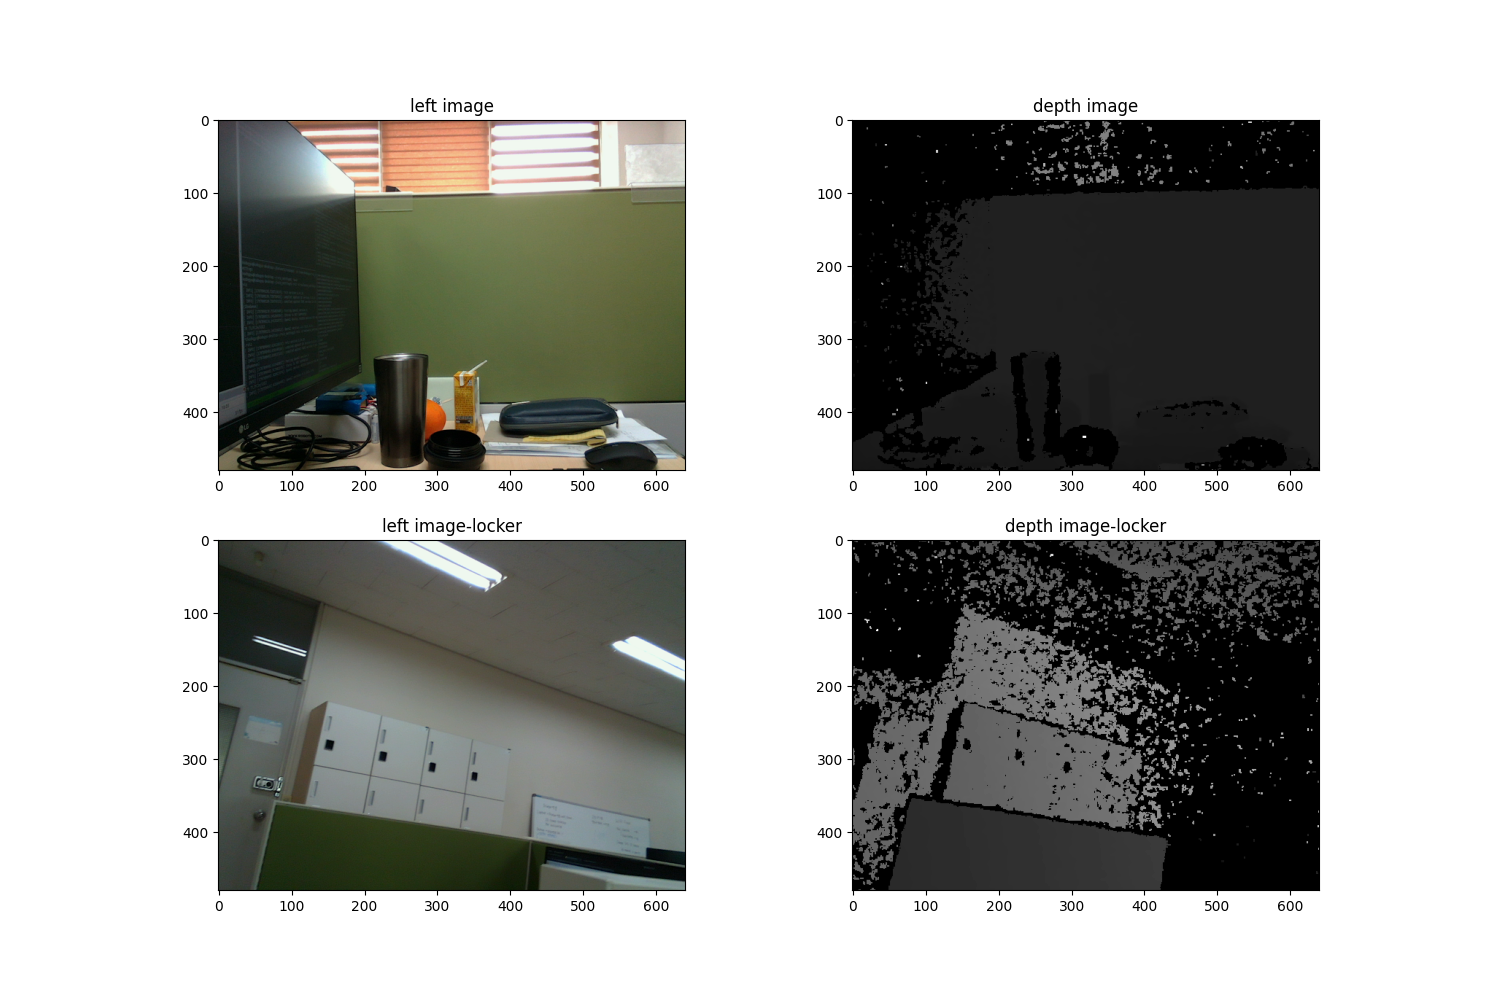

In [46]:
# Image read
left_image = cv2.imread('color_frames/color_image484.png', cv2.IMREAD_COLOR)
left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
depth_image = cv2.imread('depth_frames/depth_image213.png', cv2.IMREAD_ANYDEPTH)
left_image_locker = cv2.imread('color_frames/color_image700.png', cv2.IMREAD_COLOR)
left_image_locker = cv2.cvtColor(left_image_locker, cv2.COLOR_BGR2RGB)
depth_image_locker = cv2.imread('depth_frames/depth_image429.png', cv2.IMREAD_ANYDEPTH)

# YAML file read
yaml_filename = "/home/kodogyu/kimera_multi_ws/src/kimera_vio/params/L515_stereo/LeftCameraParams.yaml"
with open(yaml_filename, "r") as stream:
    stream.readline()  # %YAML:1.0 건너뛰기
    yaml_data = yaml.safe_load(stream)

# Confirm
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(left_image)
axs[0, 0].set_title("left image")
axs[0, 1].imshow(depth_image, cmap='gray')
axs[0, 1].set_title("depth image")
axs[1, 0].imshow(left_image_locker)
axs[1, 0].set_title("left image-locker")
axs[1, 1].imshow(depth_image_locker, cmap='gray')
axs[1, 1].set_title("depth image-locker")
plt.show()

In [57]:
def get_point_cloud(rgb_image, depth_image, fx, fy, cx, cy, scale):
    points_3d = []
    points_color = []
    # Downsample to 1/scale
    for row in range(0, rgb_image.shape[0], scale):
        for col in range(0, rgb_image.shape[1], scale):
            point_vector = np.array([col - cx, row - cy, fx])  # [x, y, z]
            point_vector = point_vector / fx
            depth = depth_image[row, col]
            if depth:
                point_color = rgb_image[row, col] / 255

                points_3d.append(list(point_vector * depth))
                points_color.append(list(point_color))


    points_3d = np.array(points_3d)
    return points_3d, points_color

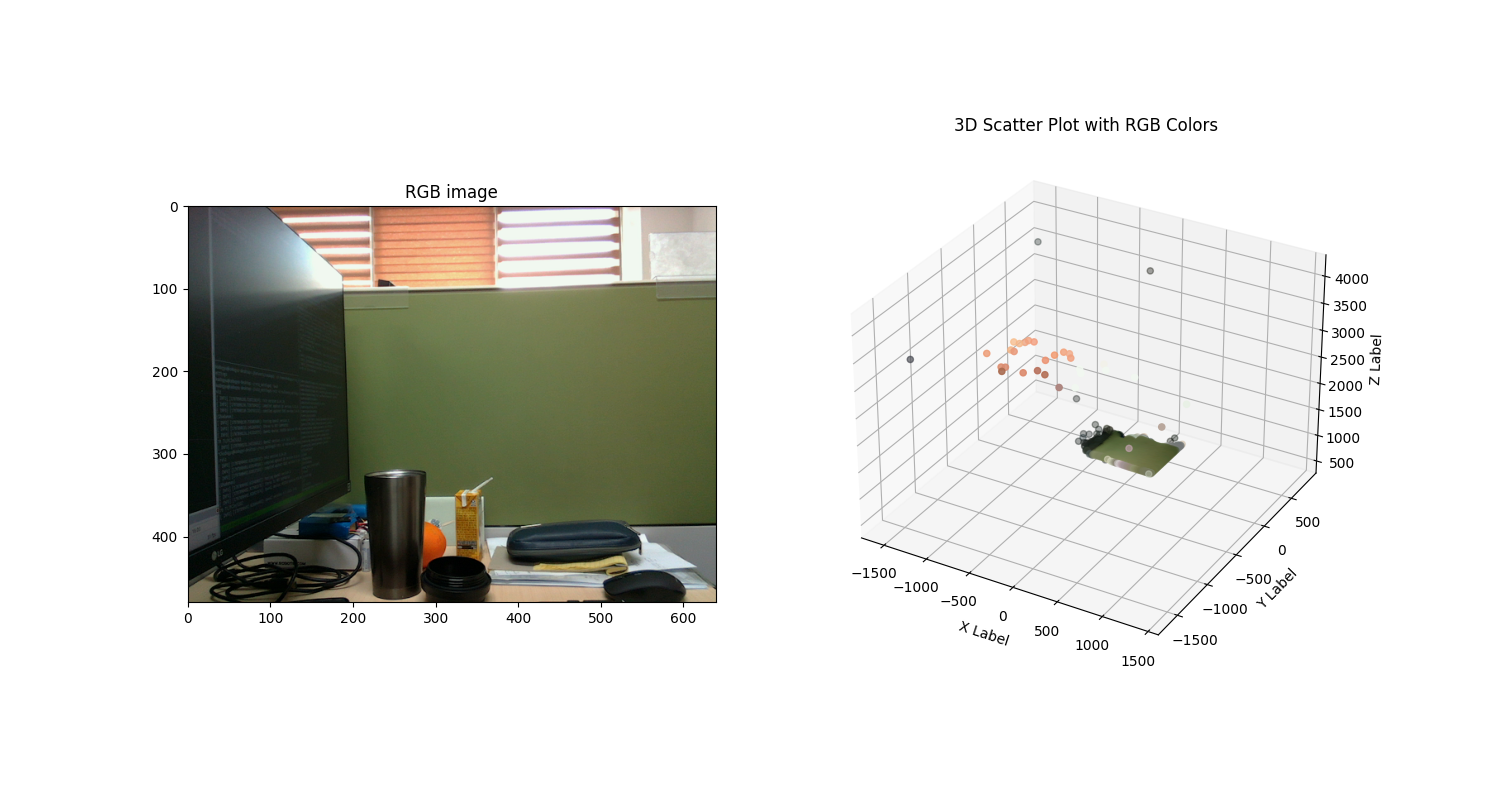

In [66]:
fx, fy, cx, cy = yaml_data["intrinsics"]

# Desk point cloud
points_3d, points_color = get_point_cloud(left_image, depth_image, fx, fy, cx, cy, 10)
points_x = points_3d[:, 0]
points_y = points_3d[:, 1]
points_z = points_3d[:, 2]

# 2D RGB image plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(left_image)
ax.set_title('RGB image')

# 3D scatter plot 생성
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax.scatter(points_x, points_y, points_z, c=points_color)

# 플롯 축 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with RGB Colors')

plt.show()

total point cloud: 11376points


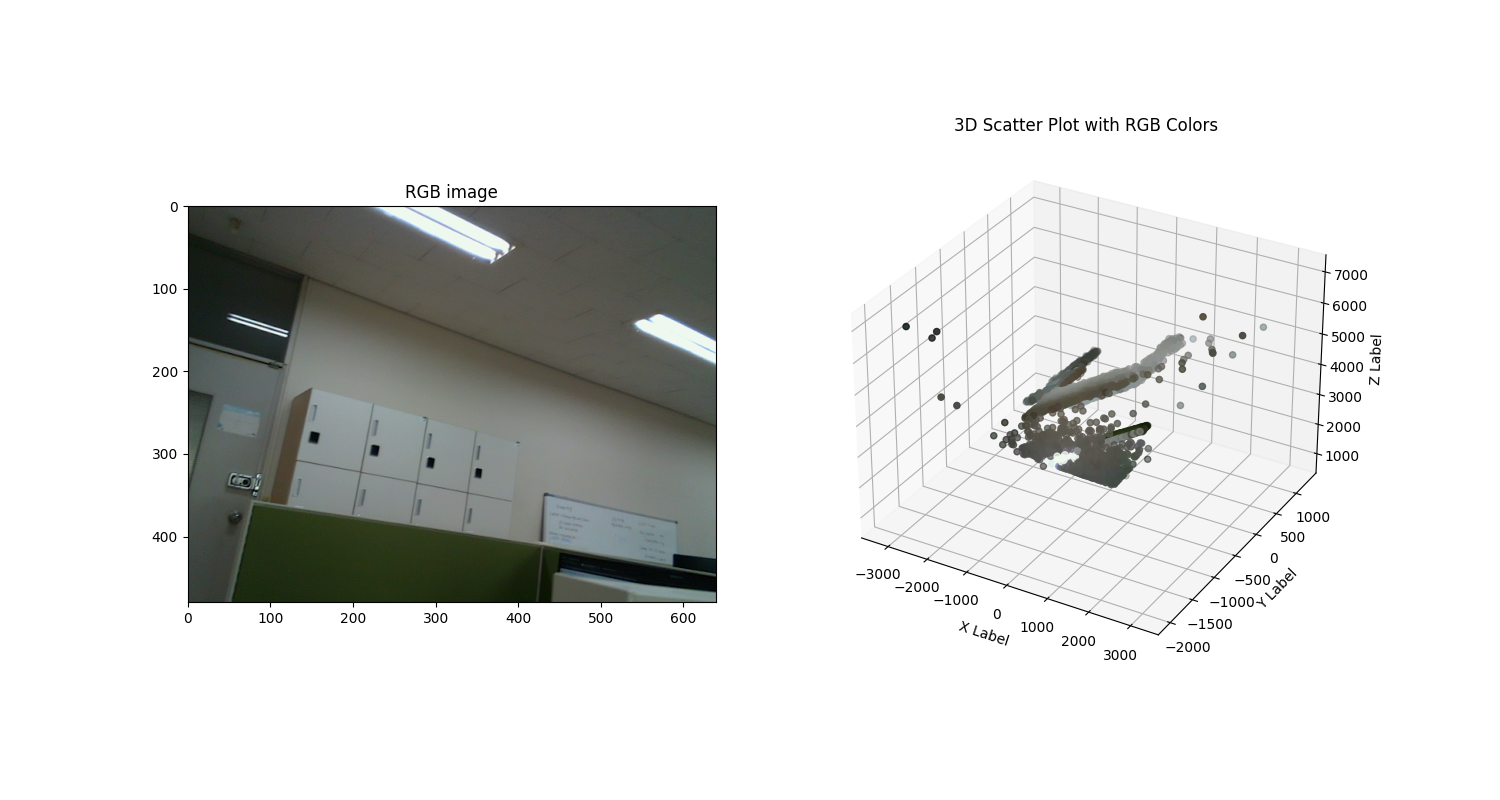

In [63]:
fx, fy, cx, cy = yaml_data["intrinsics"]

# Locker point cloud
points_3d_locker, points_color_locker = get_point_cloud(left_image_locker, depth_image_locker, fx, fy, cx, cy, 6)
print(f"total point cloud: {points_3d_locker.size}points")
points_x_locker = points_3d_locker[:, 0]
points_y_locker = points_3d_locker[:, 1]
points_z_locker = points_3d_locker[:, 2]

# 2D RGB image plot
fig_locker = plt.figure(figsize=(15, 8))
ax_color_locker = fig_locker.add_subplot(1, 2, 1)
ax_color_locker.imshow(left_image_locker)
ax_color_locker.set_title('RGB image')

# 3D scatter plot 생성
ax_locker = fig_locker.add_subplot(1, 2, 2, projection='3d')
scatter = ax_locker.scatter(points_x_locker, points_y_locker, points_z_locker, c=points_color_locker)

# 플롯 축 레이블 설정
ax_locker.set_xlabel('X Label')
ax_locker.set_ylabel('Y Label')
ax_locker.set_zlabel('Z Label')
ax_locker.set_title('3D Scatter Plot with RGB Colors')

plt.show()